---
### Contributors: Brian Waweru, Start-Date        : 08th May, 2025
---

# 0.1 : Working Libraries and Preliminaries

In [28]:
# Python Libraries
import pandas as pd
# sci-kit libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, roc_auc_score
# SMOTE 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
# modelling and evaluation
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# plotting
import matplotlib.pyplot as plt
# 
from sklearn.datasets import make_classification

#### Importing the `dataset`:

In [5]:
# dataset location
file = "churn_in_telecoms_dataset.csv"

# creating a dataframe
df = pd.read_csv(file)

# shape of the dataset
print(df.shape)

# snapshot
df.head(3)

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


# 0.2 : Feature Engineering and Preprocessing

In [6]:
# General information of each column
# Including entry types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# drop the 'phone number' column
df = df.drop(columns='phone number')
# columns
print(df.columns)

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


In [8]:
# finding out entries of the 'churn' column
print(f"The Unique entries in teh 'churn' column are: {df.churn.unique()}")
# >>> array([False,  True])
df['churn'] = df['churn'].astype(int)
# Convert boolean values in the 'churn' column to integers: False → 0, True → 1
print(f"After conversion, the new converted entries for ease of classfication are: {df.churn.unique()}")

The Unique entries in teh 'churn' column are: [False  True]
After conversion, the new converted entries for ease of classfication are: [0 1]


In [9]:
# Column Description
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [10]:
# Categorical Columns
missing_columns = [col for col in df.columns if col not in df.describe().columns]
print("Columns missing from df.describe():", missing_columns)
# printing them out
df[['state', 'international plan', 'voice mail plan']].head(3)

Columns missing from df.describe(): ['state', 'international plan', 'voice mail plan']


,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no


In [11]:
# Shape of the datset
print(f"The Shape of the dataset is: {df.shape}")
# 'Area Code' column
print(f"The 'area code has only 3 entries: {df['area code'].unique()}") # 3 

The Shape of the dataset is: (3333, 20)
The 'area code has only 3 entries: [415 408 510]


# 1.0 : Overview

## 1.1: Overview-Introduction: Customer Churn Prediction for SyriaTel

This project aims to predict customer churn for `SyriaTel`, a telecommunications company, using a sample of their historical customer data. By building a binary classification model since the customer either churns '1' or does not '0', we shall aim to identify patterns and factors that influence whether a customer will leave the company. The predictive model will assist the company in targeting at-risk customers with `retention strategies`, thereby reducing customer attrition and preserving revenue.

The overall project pipeline consists of:

1. **Business Understanding**: Understanding churn's impact on SyriaTel’s business.

2. **Data Understanding and Preparation**: Exploring the structure and distribution of data. Cleaning, transforming, and encoding the dataset.

3. **Exploratory Data Analysis (EDA)**: Finding patterns and feature relationships with churn.

4. **Model Building**: Training and tuning classifiers such as Logistic Regression, Decision Trees or Random Forests.

5. **Evaluation**: Measuring performance using metrics like accuracy, precision, recall, F1-score, and AUC as well as ROC.

6. **Interpretation**: Identifying key drivers of churn.

7. **Recommendations and Actionable Insights**: Informing business interventions to reduce churn. Provide recommendations for customer retention based on analytical findings.

## 1.2: Project-Objectives

Here are the key Objectives in this project:-

1. **Build a Predictive Model for Churn**  
2. **Identify Key Drivers of Churn**  
3. **Improve Churn Prediction Accuracy**  
4. **Support Retention Strategy Development**  
5. **Then Communicate Findings Clearly**: Present model insights and business recommendations in a format accessible to both technical and non-technical stakeholders.

However, if time-allows it is also important to explore these other secondary objectives

1. **Understand Customer Behavior**  
2. **Segment At-Risk Customers**  
3. **Evaluate Cost-Benefit Trade-offs**  
   Analyze which churn-prone customers are most valuable to retain based on their potential lifetime value.
4. **Develop a Repeatable ML Pipeline**  
   Build a clean and modular workflow that can be reused with updated customer data in the future.

# 2.0 : Business and Data Understanding

## 2.1: Business Understanding 

Customer churn is a critical business challenge for telco compianes such as SyriaTel. In a highly competitive and saturated market, retaining existing customers is often more cost-effective than acquiring new ones. Churn not only impacts immediate revenue but also affects long-term customer lifetime value, brand loyalty, and operational efficiency. Understanding why customers leave — and more importantly, identifying who is likely to leave — can empower SyriaTel to take timely, targeted actions. These may include `personalized marketing campaigns`, `service improvements`, or `tailored retention offers`. 

The core business goal of this project is to reduce churn by building a predictive model that accurately flags at-risk customers. This enables SyriaTel to shift from reactive to proactive customer retention, thereby reducing revenue loss and enhancing customer satisfaction.

The project aligns with SyriaTel's strategic priorities:

1. `Preserving revenue` by minimizing customer loss.

2. `Improving customer loyalty` through better engagement.

3. `Increasing the return on investment (ROI)` of marketing and support efforts.

4. `Leveraging data` to drive smarter, faster business decisions.

Ultimately, this project supports SyriaTel’s mission to build lasting customer relationships in a competitive telecom landscape.

## 2.2: Data Understanding

The dataset provided by SyriaTel consists of over 3300 customer records and 21 features, each capturing various aspects of a customer's interaction with the company's service. The target variable is `churn`, which indicates whether a customer has discontinued service or not. Understanding the composition and behavior of these column-features is critical in helping us build an effective churn prediction model.

1. Several features describe customer demographics and account information, such as `state`, `area code`, and `account length`. While these may not directly cause churn, they can help identify regional trends or the effect of customer tenure on loyalty.

2. Other features capture service plans (`international plan`, `voice mail plan`), indicate whether a customer is subscribed to specific services. These features may influence customer satisfaction and costs, potentially affecting their decision to stay or leave.

3. A significant portion of the dataset focuses on usage behavior, including `call minutes`, `number of calls`, and `charges` during the day, evening, night, and for international calls. These metrics are split into separate fields for minutes, calls, and charges. This could allow an examinantion of customer engagement and how it relates to churn. However, since charges are typically derived from minutes, some of these columns may be redundant.

4. The dataset also includes features such as the number of `customer service calls`, which can be a strong indicator of dissatisfaction—customers who contact support frequently may be more likely to churn.

5. Importantly, the dataset is clean, with `no missing values`, and the data types are appropriate for analysis—numerical for continuous variables and object or boolean for categorical ones. However, some preprocessing will be necessary, including encoding categorical variables and dropping non-informative columns like phone number, as done previously, which acts only as an identifier.

Through a Thorough EDA, we aim to understand the relationships between these features and the likelihood of churn. Identifying patterns, such as whether certain service plans correlate with higher churn, or whether customers with higher international usage are more likely to leave, will help us build a predictive model and generate actionable business insights.

# 3: Data Preparation 

### 3.1 : Handle Categorical Variables

In [12]:
# Categories i.e. classify the values in the 'international plan' as either 1 or 0
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
# Categories i.e. classify the values in the 'voice mail plan' as either 1 or 0
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
# print feedback that it's done
print('Success: It is done!')

Success: It is done!


### 3.2 : Drop Irrelevant or Redundant Columns

As mentioned earlier in the overview and business understanding, features like `total day charge` might be redundant if `total day minutes` already provides similar information. You might choose to drop one.

- `note:` The feature `phone number` had been dropped already. This is because it only serves as a customer identifier.
- `note:` As noted earlier, there are no missing values. See section under `df.info()`.

In [13]:
# redundant columns
redundant_columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
# dropping them
df.drop(redundant_columns, axis=1, inplace=True)
# print feedback that it's done
print('Success: It is done!')

Success: It is done!


### 3.3 : Standardization 

Now, we transform features in the datasset i.e. `total day minutes`, `number vmail messages`, `total eve minutes` so that they have a common scale. 

In [14]:
# Create a scaler object
scaler = StandardScaler()

# Choice of columns to standadise
cols_to_standardize = ['total day minutes', 'number vmail messages', 'total eve minutes']

# Apply standardization to relevant columns
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

# print feedback that it's done
print('Success: It is done!')

Success: It is done!


### 3.4 : Feature Engineering

- Since the dataset is riddled with `minutes`, suppose we have `Total Call Usage` i.e the sum of `total day minutes`, `total eve minutes`, `total night minutes`, and `total intl minutes`. 

- Also, we can have `Average Call Duration` i.e. for Average of `day`, `evening`, `night`, and `international minutes`.

In [15]:
# TOTAL CALL USAGE:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
# AVERAGE CALL DURATION:
df['average call duration'] = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].mean(axis=1)
# print feedback that it's done
print('Success: It is done!')

Success: It is done!


### 3.5 : Choosing `Target` and `Feature` column(s)

It is obvious that the choice of our Target column is `churn` while the rest are automatically the `Features`.

Now, Splitting the Data into `Training` and `Test` dataSets

In [16]:
# Target Feature ## Dependent Feature
y = df.churn
# Other Features ## independent Features
X = df.drop('churn', axis=1)
# split-test-code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# print feedback that it's done
print('Success: It is done!')

Success: It is done!


### 3.6 : Check for Class Imbalance

Let's ensure that the model doesn’t learn misleading patterns — especially because we have binary classification problem.

In [17]:
# first, let's check class distribution
print(f"The Value counts are: \n{df.churn.value_counts()}", end = '\n\n')
# The proportions are:
print('Essentially, that is:-', end = '\n')
print(f"{df['churn'].value_counts(normalize=True)}", end = '\n')
# Inference and Conclusion 
churn_perc = round(df['churn'].value_counts(normalize=True)[1] * 100, 2)
# print the result
print(' ')
print(f"INFERENCE: So, only {churn_perc}% of the customers churn — this shows class imbalance.")

The Value counts are: 
0    2850
1     483
Name: churn, dtype: int64

Essentially, that is:-
0    0.855086
1    0.144914
Name: churn, dtype: float64
 
INFERENCE: So, only 14.49% of the customers churn — this shows class imbalance.


#### `Inference`: 

This class imbalance refers to the fact that one class (non-churn) significantly outweighs the other `churning` group. This imbalance can affect the performance of machine learning model. They may become biased toward predicting the majority class, the `non-churning`, which could result in misleading accuracy scores.

In [18]:
# RE_DONE
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first avoids dummy trap

# 
le = LabelEncoder()
X['state'] = le.fit_transform(X['state'])


# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [19]:
# Step 1: Encode categorical variables (e.g., 'State', 'Gender', etc.)
X_encoded = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, stratify=y, test_size=0.2, random_state=42
)

# Step 3: Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 4: Train a Random Forest Classifier with class weights to handle class imbalance
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_res, y_train_res)

# Step 5: Make predictions on the test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Step 6: Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       570
           1       0.57      0.59      0.58        97

    accuracy                           0.88       667
   macro avg       0.75      0.76      0.75       667
weighted avg       0.88      0.88      0.88       667

ROC-AUC Score: 0.8444112859468258


# 4: Modeling and Evaluation

#### 4.1 : Logistic Regression

Let us start with a `simple Logistic Regression` model, before we try others like Random Forest.

In [20]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Use class_weight if you didn't use SMOTE
model.fit(X_train, y_train)

c:\Users\rurig\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

#### 4.2 : Others

In [21]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Feature Scaling (optional, but needed for SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 4.3 : Evaluation

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=10000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    # "XGBoost": XGBClassifier(scale_pos_weight=6, use_label_encoder=False, eval_metric='logloss', random_state=42),
    # "SVM": SVC(class_weight='balanced', probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():

    print(f"\n----- {name} -----")
    
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))



----- Logistic Regression -----
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       570
           1       0.35      0.74      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

ROC AUC: 0.8154277446192801

----- Random Forest -----
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       570
           1       0.89      0.56      0.68        97

    accuracy                           0.93       667
   macro avg       0.91      0.77      0.82       667
weighted avg       0.92      0.93      0.92       667

ROC AUC: 0.9024507144149033

----- KNN -----
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       570
           1       0.70      0.31      0.43        97

    accuracy                           0.88      

# 5: Evaluation

#### 5.1.1 : Logistical Regression

After training the model, it's important to evaluate its performance using:

1. `Accuracy`: The percentage of correct predictions.

2. `Confusion Matrix`: 

    - Helps you understand the model’s performance with respect to false positives, false negatives, true positives, and true negatives.

3. `Precision, Recall, F1-Score`: 
    - Especially important for imbalanced datasets or when the costs of false positives/negatives differ.

4. `ROC-AUC Curve`: Evaluate the classifier’s ability to distinguish between classes.

In [41]:
# Train the Model
# Fit a Logistic Regression model
Model = LogisticRegression()
Model.fit(X_train_scaled, y_train)

# Get prediction Probabilities
# Predict probability estimates for the positive class
y_probs = Model.predict_proba(X_test_scaled)[:, 1]
# y_probs

# Computing ROC Curve and AUC
# Compute False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_probs)
auc

0.5122275478431235

#### 5.1.2 : Plot the ROC Curve

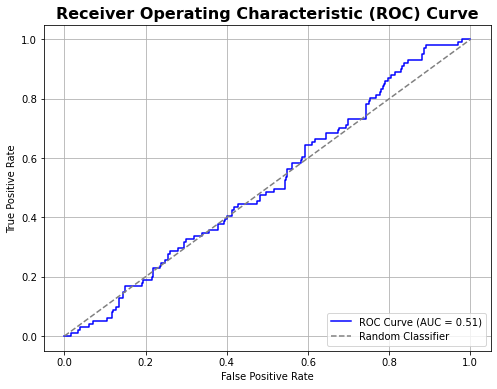

In [42]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', 
          fontweight = 'bold', fontsize = 16)
plt.legend(loc = 4)
plt.grid(True)
plt.show()

# 6: Conclusions and Recommendations